In [2]:
from skimage.io import imread,imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

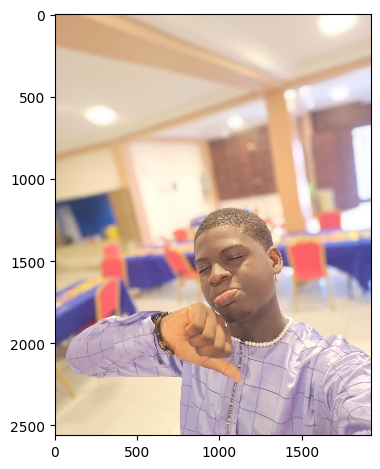

In [10]:
image=imread('Alim.jpeg')
gray=rgb2gray(image)
imshow(image)

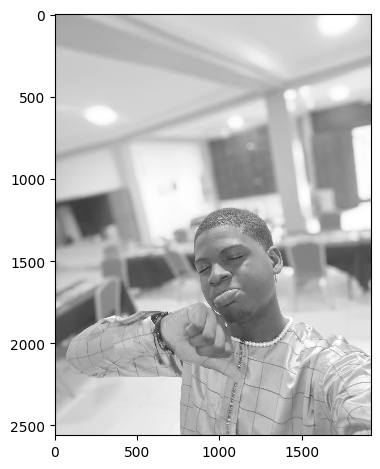

In [11]:
#Image en nuances gris
imshow(gray)

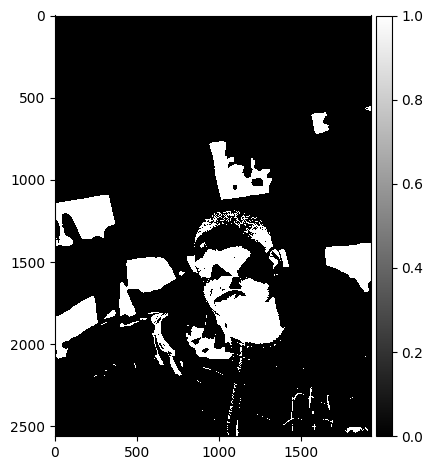

In [12]:
#Image en noir et blanc
image=np.where(gray>128/256, 0, 1)
imshow(image ,cmap=plt.get_cmap('gray'))

In [13]:
#Histograme avec sckiti-image
def imageHist(image):
  _,axis=plt.subplots(1,2,figsize=(12,3))
  if (image.ndim==2):
    axis[0].imshow(image,cmap=plt.get_cmap('gray'))
    axis[1].set_title('hISTOGRAME')
    axis[0].set_title('Image en nuance de gris')
    hist=exposure.histogram(image)
    axis[1].plot(hist[0])
  else:
    axis[0].imshow(image, cmap='gray')
    axis[1].set_title('hISTOGRAME')
    axis[0].set_title('Image en couleur')
    rgbcolors=['red','green','blue']
    for i,mycolor in enumerate(rgbcolors):
      hist=exposure.histogram(image[:,:,i])
      axis[1].plot(hist[0],color=rgbcolors[i])

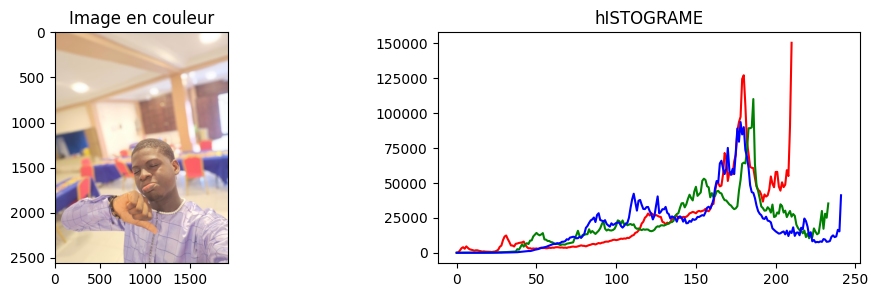

In [15]:
im=imread('Alim.jpeg')
imageHist(im)

In [16]:
#Histogrammes avec opencv
import cv2 as cv
def hisopencv(image):
  _,axis=plt.subplots(1,2,figsize=(12,3))
  axis[0].imshow(image)
  axis[1].set_title('hISTOGRAME')
  axis[0].set_title('Image ')
  rgbcolors=['red','green','blue']
  for i,mycolor in enumerate(rgbcolors):
    hist=cv.calcHist([image],[i],None,[256],[0,256])
    axis[1].plot(hist,color=rgbcolors[i])

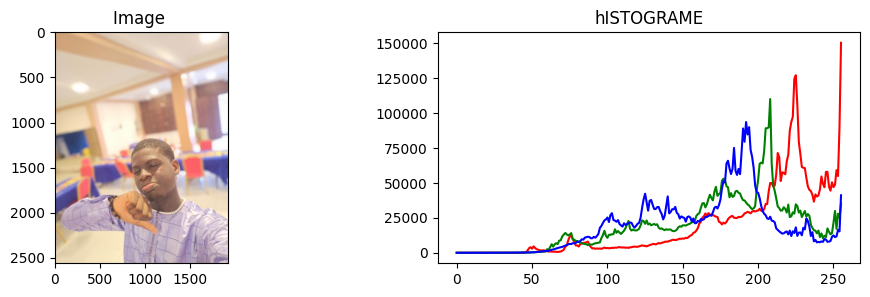

In [17]:
hisopencv(im)


In [19]:
!pip install PyAudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for PyAudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyAudio
Failed to build PyAudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (PyAudio)


In [20]:
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

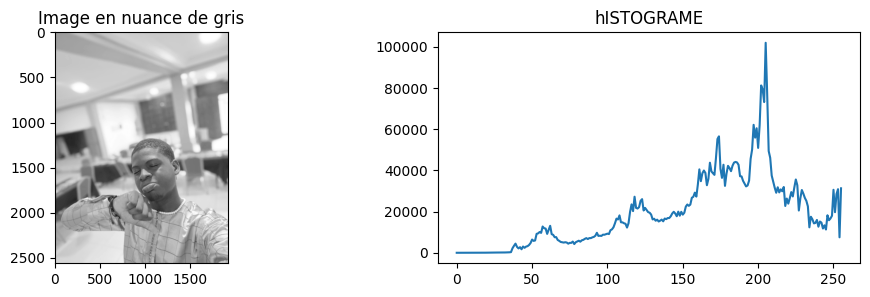

In [24]:
imageHist(gray)

ON constate que la plus part des pixels ont une intensité de 150 à  210 envrion


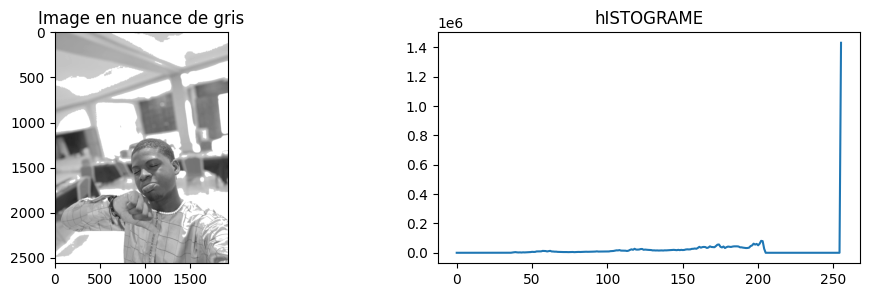

In [33]:
Im=np.where(gray>210/256, 1,gray)
imageHist(Im)

Je remarque que notre image se rapproche beaucoup plus du noir et blanc

In [37]:
#Statistique
def RGBStats(image):
    colors = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        min_color =np.min(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(im)

,Min,Max,Mean,Median
Red,45,255,204.821738,217.0
Green,22,255,177.657447,185.0
Blue,14,255,166.775390,177.0


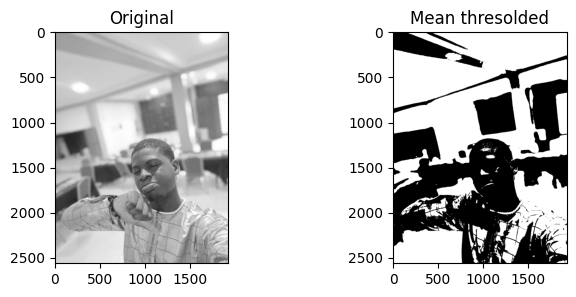

In [38]:
#Seuillage binaire , utiliser pour mettre les images en noir et blanc
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')

thresholdMeanDisplay(gray)

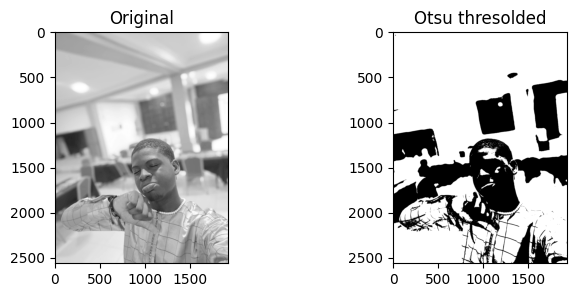

In [39]:
#Seuillage Otsu
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

thresholdOtsuDisplay(gray)

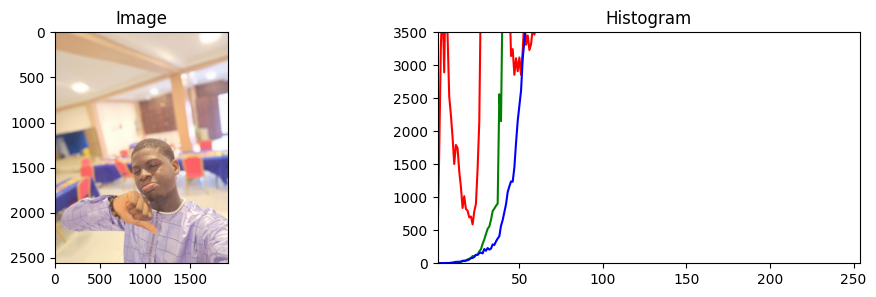

In [40]:
#Seuillage des images en couleur
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 3500])
histColor(im)

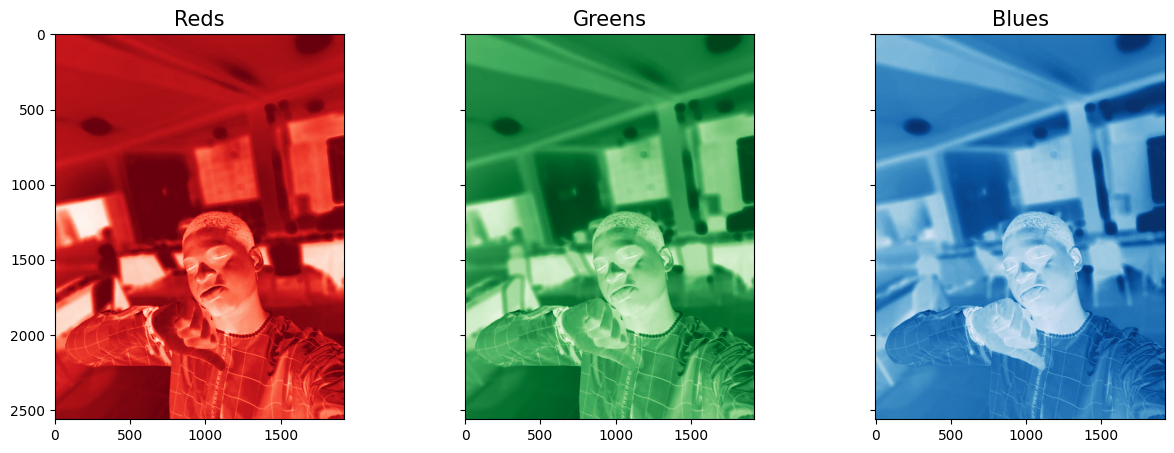

In [41]:
rgb = ['Reds','Greens','Blues']
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   axes[i].imshow(im[:,:,i], cmap = rgb[i])
   axes[i].set_title(rgb[i], fontsize = 15)

mignon

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


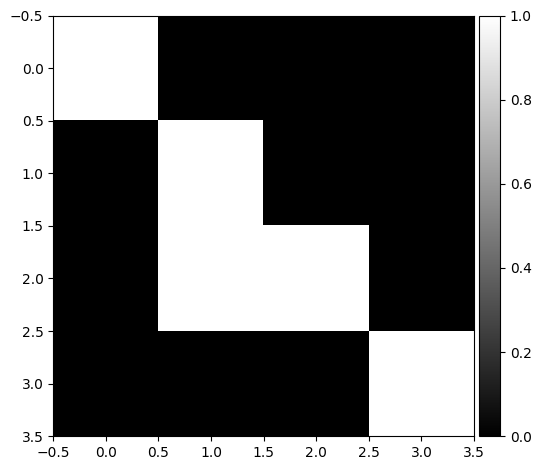

In [44]:
#Rotation
from skimage import transform
import math
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))

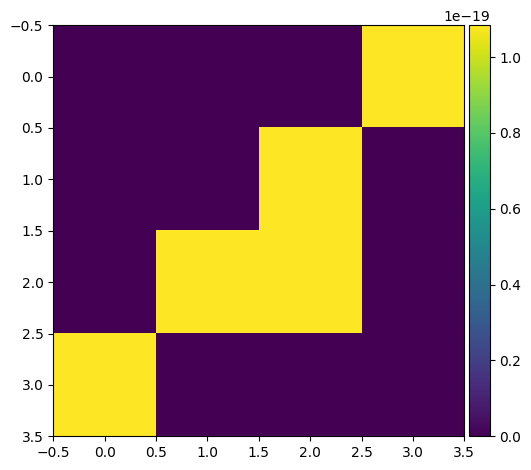

In [45]:
rotated= transform.rotate(image_test, 90)
imshow(rotated)

In [46]:
rotated

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08420217e-19],
       [0.00000000e+00, 0.00000000e+00, 1.08420217e-19, 0.00000000e+00],
       [1.32776472e-35, 1.08420217e-19, 1.08420217e-19, 0.00000000e+00],
       [1.08420217e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

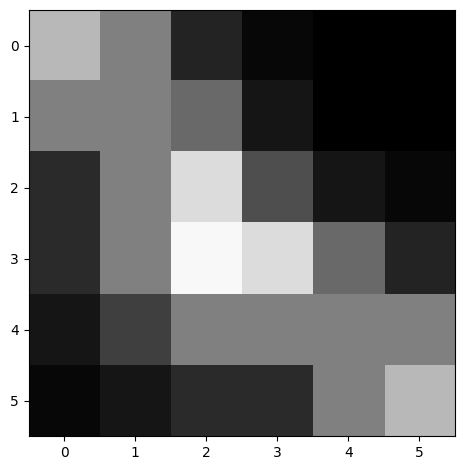

In [52]:
#changement de taille
resized=transform.resize(image_test,(6,6), preserve_range=True)
imshow(resized)

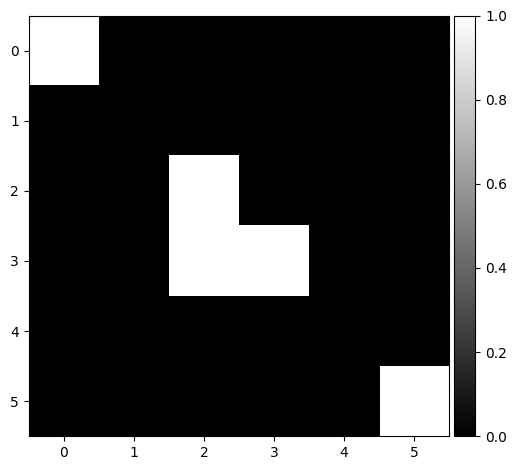

In [53]:
intresized = resized > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

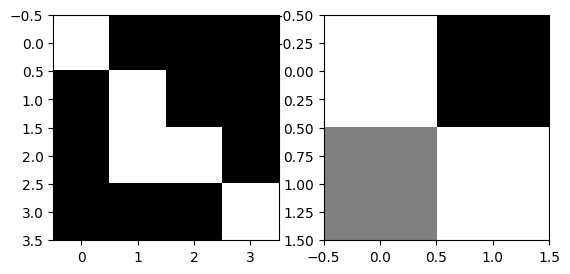

In [54]:
#changement d'échelle
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

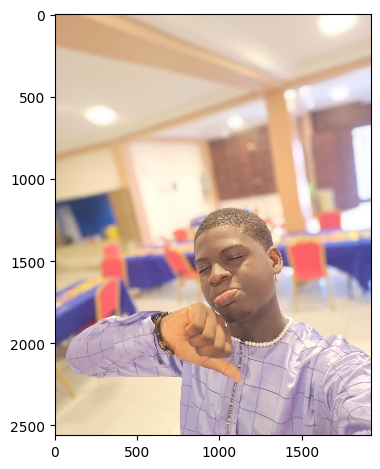

In [56]:
#transformation euclidiennes
imshow(im)

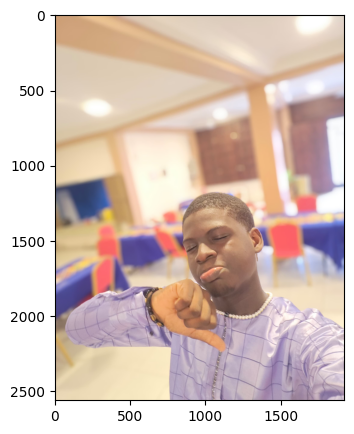

In [57]:
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
plt.figure(figsize=(8, 5))
ima = transform.warp(image, tr)
plt.imshow(im)

j'ai pas d'image pas droite mais j'ai hyper bien compris le principe


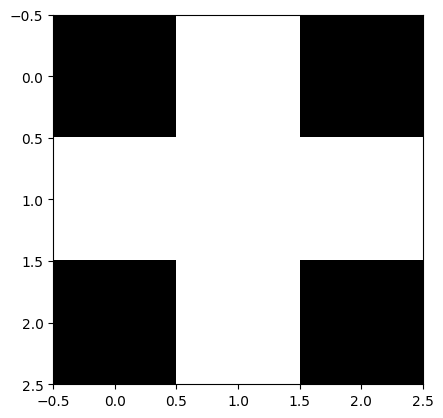

In [58]:
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap

imshow(morphology.disk(1), cmap=get_cmap('gray'))

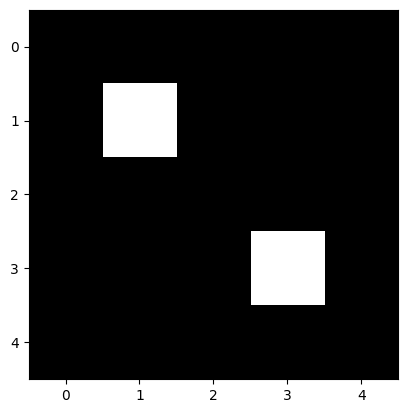

In [59]:
#Dilatation
image_test = np.array([[0,0,0,0,0],
                       [0,1,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,1,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

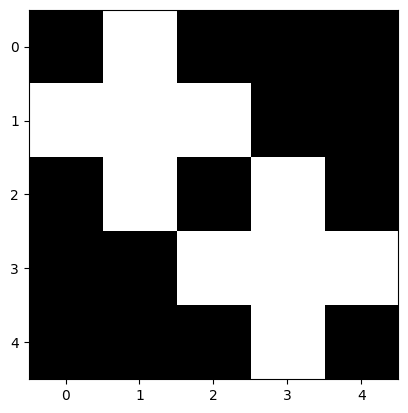

In [62]:
#Dilatation
dilated = morphology.binary_dilation(image_test, morphology.disk(1))
imshow(dilated, cmap=get_cmap('gray'))

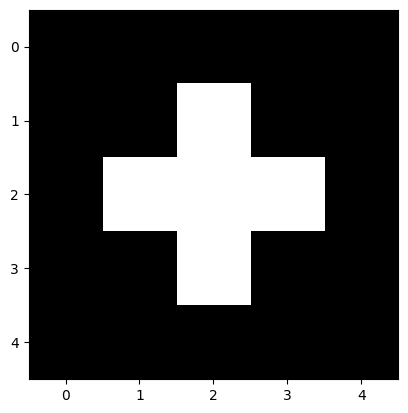

In [63]:
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

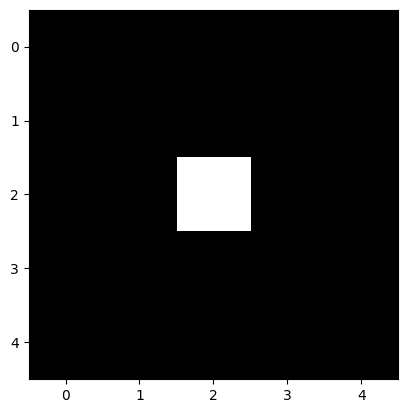

In [64]:
#erosion
eroded = morphology.binary_erosion(image_test, morphology.disk(1))
imshow(eroded, cmap=get_cmap('gray'))

In [68]:
#Convolution
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

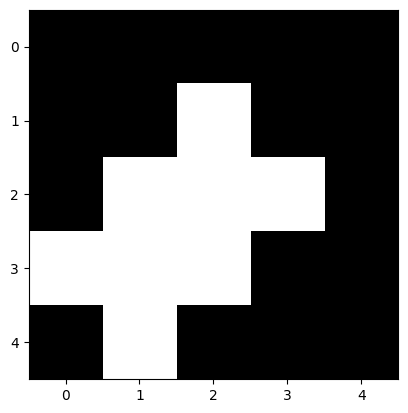

In [70]:
image_test = np.array([[0,0,0,0,0],
[0,0,1,0,0],
[0,1,1,1,0],
[1,1,1,0,0],
[0,1,0,0,0]])
imshow(image_test,
cmap=get_cmap('gray'))

In [71]:
#noyau de convolution
kernel = np.ones((3,3), np.float32)/2

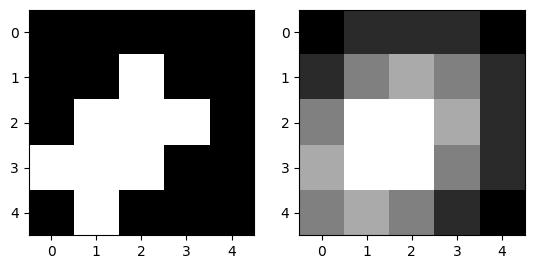

In [72]:
#produit de convolution
imgconvol = signal.convolve2d(image_test, kernel, mode='same',boundary='fill', fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

In [73]:
#détection de contours
kernel_contour = np.array([[0,1,0],
[1,-4,1],
[0,1,0]])

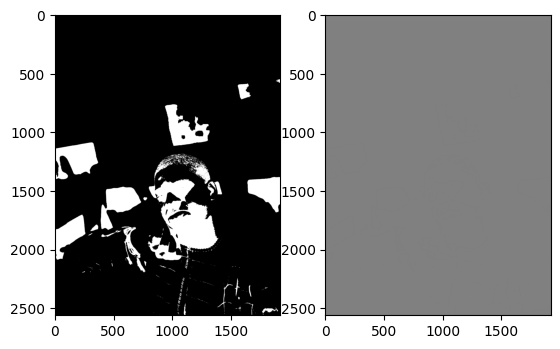

In [74]:
imgconvol = signal.convolve2d(image,
kernel_contour,
boundary='symm',
mode='same')
displayTwoBaWImages(image, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

on voit pas bien, mais c'est hyper bleuffant, j'ai compris le principe et sais comment l'appliquer

In [75]:
#Augmentation de contraste
kernel_inccontrast = np.array([[0,0,0,0,0],
[0,0,-1,0,0],
[0,-1,5,-1,0],
[0,0,-1,0,0],
[0,0,0,0,0]])

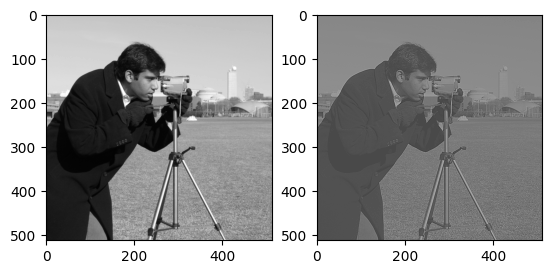

In [76]:
imgcontrast = signal.convolve2d(data.camera(),
kernel_inccontrast,
boundary='symm',
mode='same')
displayTwoBaWImages(data.camera(), imgcontrast)

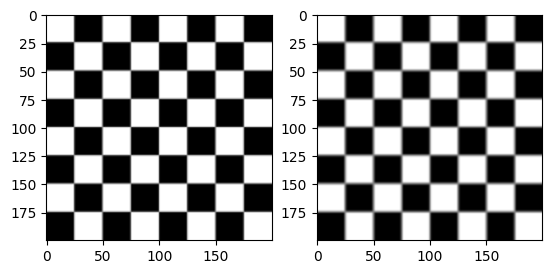

In [77]:
#flouttage
kernel = np.array([[0,0,0,0,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(),
kernel,
boundary='symm',
mode='same')
displayTwoBaWImages(data.checkerboard(), img)

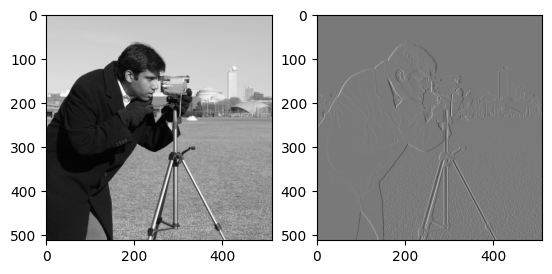

In [78]:
#Renforcement de bords
kernel = np.array([[0,0,0],
[-1,1,0,],
[0,0,0,]])
img = signal.convolve2d(data.camera(),
kernel,
boundary='symm',
mode='same')
displayTwoBaWImages(data.camera(), img)

In [80]:
#Construisons notre CNN avec Tensorflow Objectif
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [81]:
dataset_fashion_mnsit = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset_fashion_mnsit.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [82]:
pd.DataFrame(y_train)[0].value_counts()

,count
0,
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000


In [83]:
X_train = X_train / 255
X_test = X_test / 255
print(f"Données entrainement: {X_train.shape}, Test: {X_test.shape}")

Données entrainement: (60000, 28, 28), Test: (10000, 28, 28)


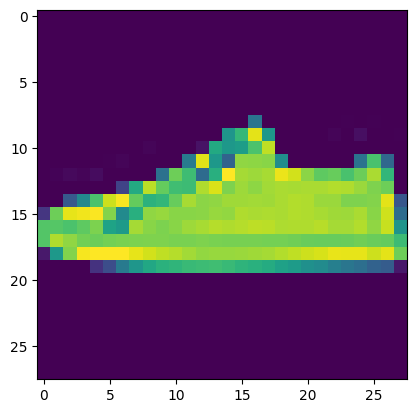

In [84]:
plt.imshow(X_train[1730])

In [85]:
y_train[1730]

7

In [86]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [87]:
mon_cnn = tf.keras.Sequential()

# 3 couches de convolution, avec Nb filtres progressif 32, 64 puis 128
mon_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# remise à plat
mon_cnn.add(Flatten())

# Couche dense classique ANN
mon_cnn.add(Dense(512, activation='relu'))

# Couche de sortie (classes de 0 à 9)
mon_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [89]:
mon_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mon_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
mon_cnn.fit(x=X_train,
            y=y_train,
            validation_data=(X_test, y_test),
            epochs=25,
            callbacks=[early_stop])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.6993 - loss: 0.7969 - val_accuracy: 0.8253 - val_loss: 0.4737
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.8496 - loss: 0.4080 - val_accuracy: 0.8489 - val_loss: 0.4122
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8708 - loss: 0.3472 - val_accuracy: 0.8664 - val_loss: 0.3681
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.8881 - loss: 0.3021 - val_accuracy: 0.8772 - val_loss: 0.3322
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8984 - loss: 0.2679 - val_accuracy: 0.8785 - val_loss: 0.3484
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9041 - loss: 0.2546 - val_accuracy: 0.8896 - val_loss: 0.3133
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9137 - loss: 0.2308 - val_accuracy: 0.8859 - val_loss: 0.3181
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9185 -

<Axes: >

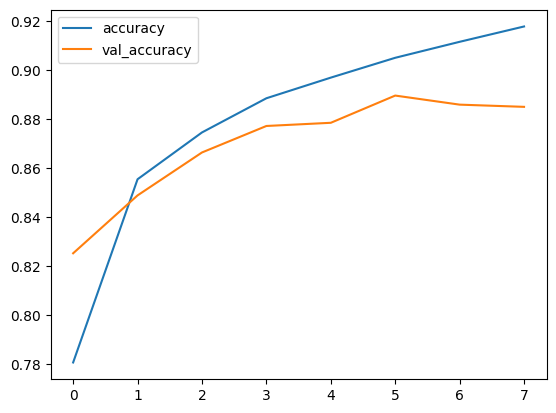

In [91]:
losses = pd.DataFrame(mon_cnn.history.history)
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

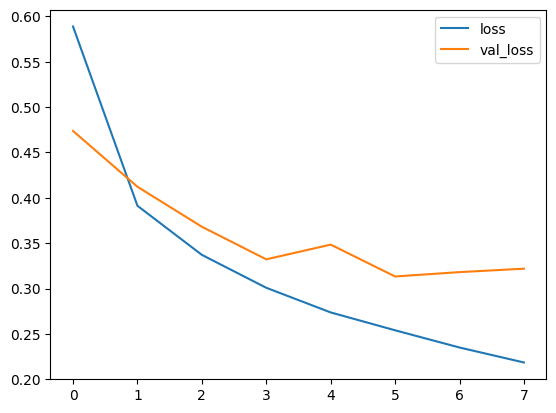

In [92]:
losses[['loss', 'val_loss']].plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


<Axes: >

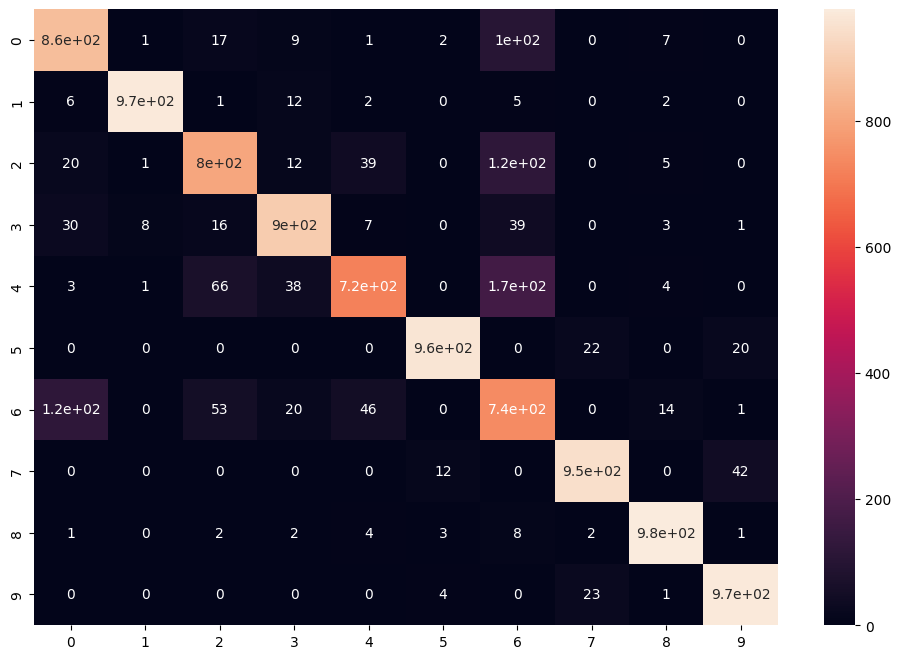

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, np.argmax(mon_cnn.predict(X_test), axis=1)), annot=True)

In [95]:
#Prédiction
img=X_train[1730]
mon_cnn.predict(img.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[5.4900278e-07, 4.4955861e-08, 3.0849982e-08, 8.2790329e-08,
        7.2522958e-08, 7.6234329e-04, 1.4659786e-08, 9.9755657e-01,
        3.1511729e-07, 1.6798341e-03]], dtype=float32)

In [96]:
np.argmax(mon_cnn.predict(img.reshape(1,28,28,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


7

ouiiiiiiiiiiiiii